## Assignment: predicting house prices

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

1) Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:
    - postgres_user = 'dsbc_student'
    - postgres_pw = '7*.8G9QH21'
    - postgres_host = '142.93.121.174'
    - postgres_port = '5432'
    - postgres_db = 'houseprices'

Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

2) Investigate the data, and do any necessary data cleaning.

3) Explore the data and find some variables that you think would be useful in predicting house prices.

4) Build your initial model using these features and estimate the parameters using OLS.


In [1]:

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
#Load the data

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host,
    postgres_port, postgres_db))

prices_df= pd.read_sql_query('select * from houseprices', con=engine)

#close the connection
engine.dispose()

prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
#Dropping columns with NaN values that are >50% of column
prices_df.drop(columns=['id','alley', 'poolqc','fence','fireplacequ', 'miscfeature'], axis=1, inplace=True)

In [4]:
prices_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mssubclass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
lotfrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
lotarea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
overallqual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
overallcond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
yearbuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
yearremodadd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
masvnrarea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
bsmtfinsf1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
bsmtfinsf2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


### 1) Clean and explore the data

In [5]:
#Use .mean() to in remaining missing values for each column
numeric_cols=prices_df.select_dtypes(include=[np.number]).columns
names=prices_df[numeric_cols]

for name in names:
    prices_df["{}".format(name)]= prices_df["{}".format(name)]\
        .transform(lambda x : x.fillna(x.mean()))

In [6]:
prices_df.dropna(inplace=True)

In [7]:
prices_df.isnull().sum()/prices_df.isnull().count()

mssubclass       0.0
mszoning         0.0
lotfrontage      0.0
lotarea          0.0
street           0.0
lotshape         0.0
landcontour      0.0
utilities        0.0
lotconfig        0.0
landslope        0.0
neighborhood     0.0
condition1       0.0
condition2       0.0
bldgtype         0.0
housestyle       0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
roofstyle        0.0
roofmatl         0.0
exterior1st      0.0
exterior2nd      0.0
masvnrtype       0.0
masvnrarea       0.0
exterqual        0.0
extercond        0.0
foundation       0.0
bsmtqual         0.0
bsmtcond         0.0
                ... 
bsmtfullbath     0.0
bsmthalfbath     0.0
fullbath         0.0
halfbath         0.0
bedroomabvgr     0.0
kitchenabvgr     0.0
kitchenqual      0.0
totrmsabvgrd     0.0
functional       0.0
fireplaces       0.0
garagetype       0.0
garageyrblt      0.0
garagefinish     0.0
garagecars       0.0
garagearea       0.0
garagequal       0.0
garagecond   

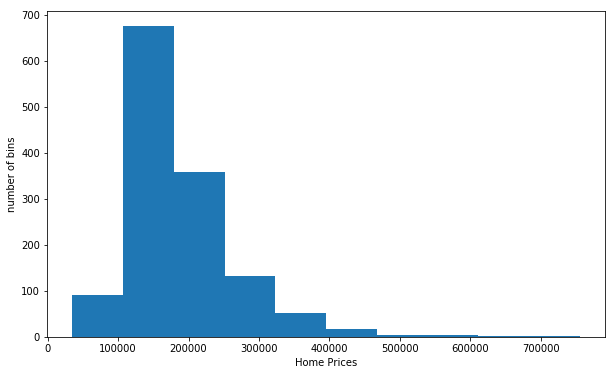

In [8]:
#Check distribution of sales price (target variable)

plt.figure(figsize=(10,6))

plt.hist(prices_df['saleprice'])
plt.xlabel('Home Prices')
plt.ylabel('number of bins')
plt.show()

In [12]:
#Look at correlations among feastures and target variable
numeric_columns = prices_df.select_dtypes(['int64', 'float64']).columns
non_numeric_columns = prices_df.select_dtypes(['object']).columns

np.abs(prices_df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.783546
grlivarea        0.711706
garagecars       0.640154
garagearea       0.607535
firstflrsf       0.604714
totalbsmtsf      0.602042
fullbath         0.569313
totrmsabvgrd     0.551821
yearbuilt        0.504297
yearremodadd     0.501435
garageyrblt      0.481730
masvnrarea       0.465811
fireplaces       0.445434
bsmtfinsf1       0.359677
lotfrontage      0.327831
openporchsf      0.322786
secondflrsf      0.311354
wooddecksf       0.305983
halfbath         0.258175
lotarea          0.254757
bsmtfullbath     0.209695
bsmtunfsf        0.191689
bedroomabvgr     0.169266
enclosedporch    0.127385
kitchenabvgr     0.111408
overallcond      0.108627
screenporch      0.096624
poolarea         0.091881
threessnporch    0.042159
mosold           0.041310
bsmtfinsf2       0.031226
bsmthalfbath     0.030175
yrsold           0.020451
miscval          0.016990
lowqualfinsf     0.009992
Name: saleprice, dtype: float64

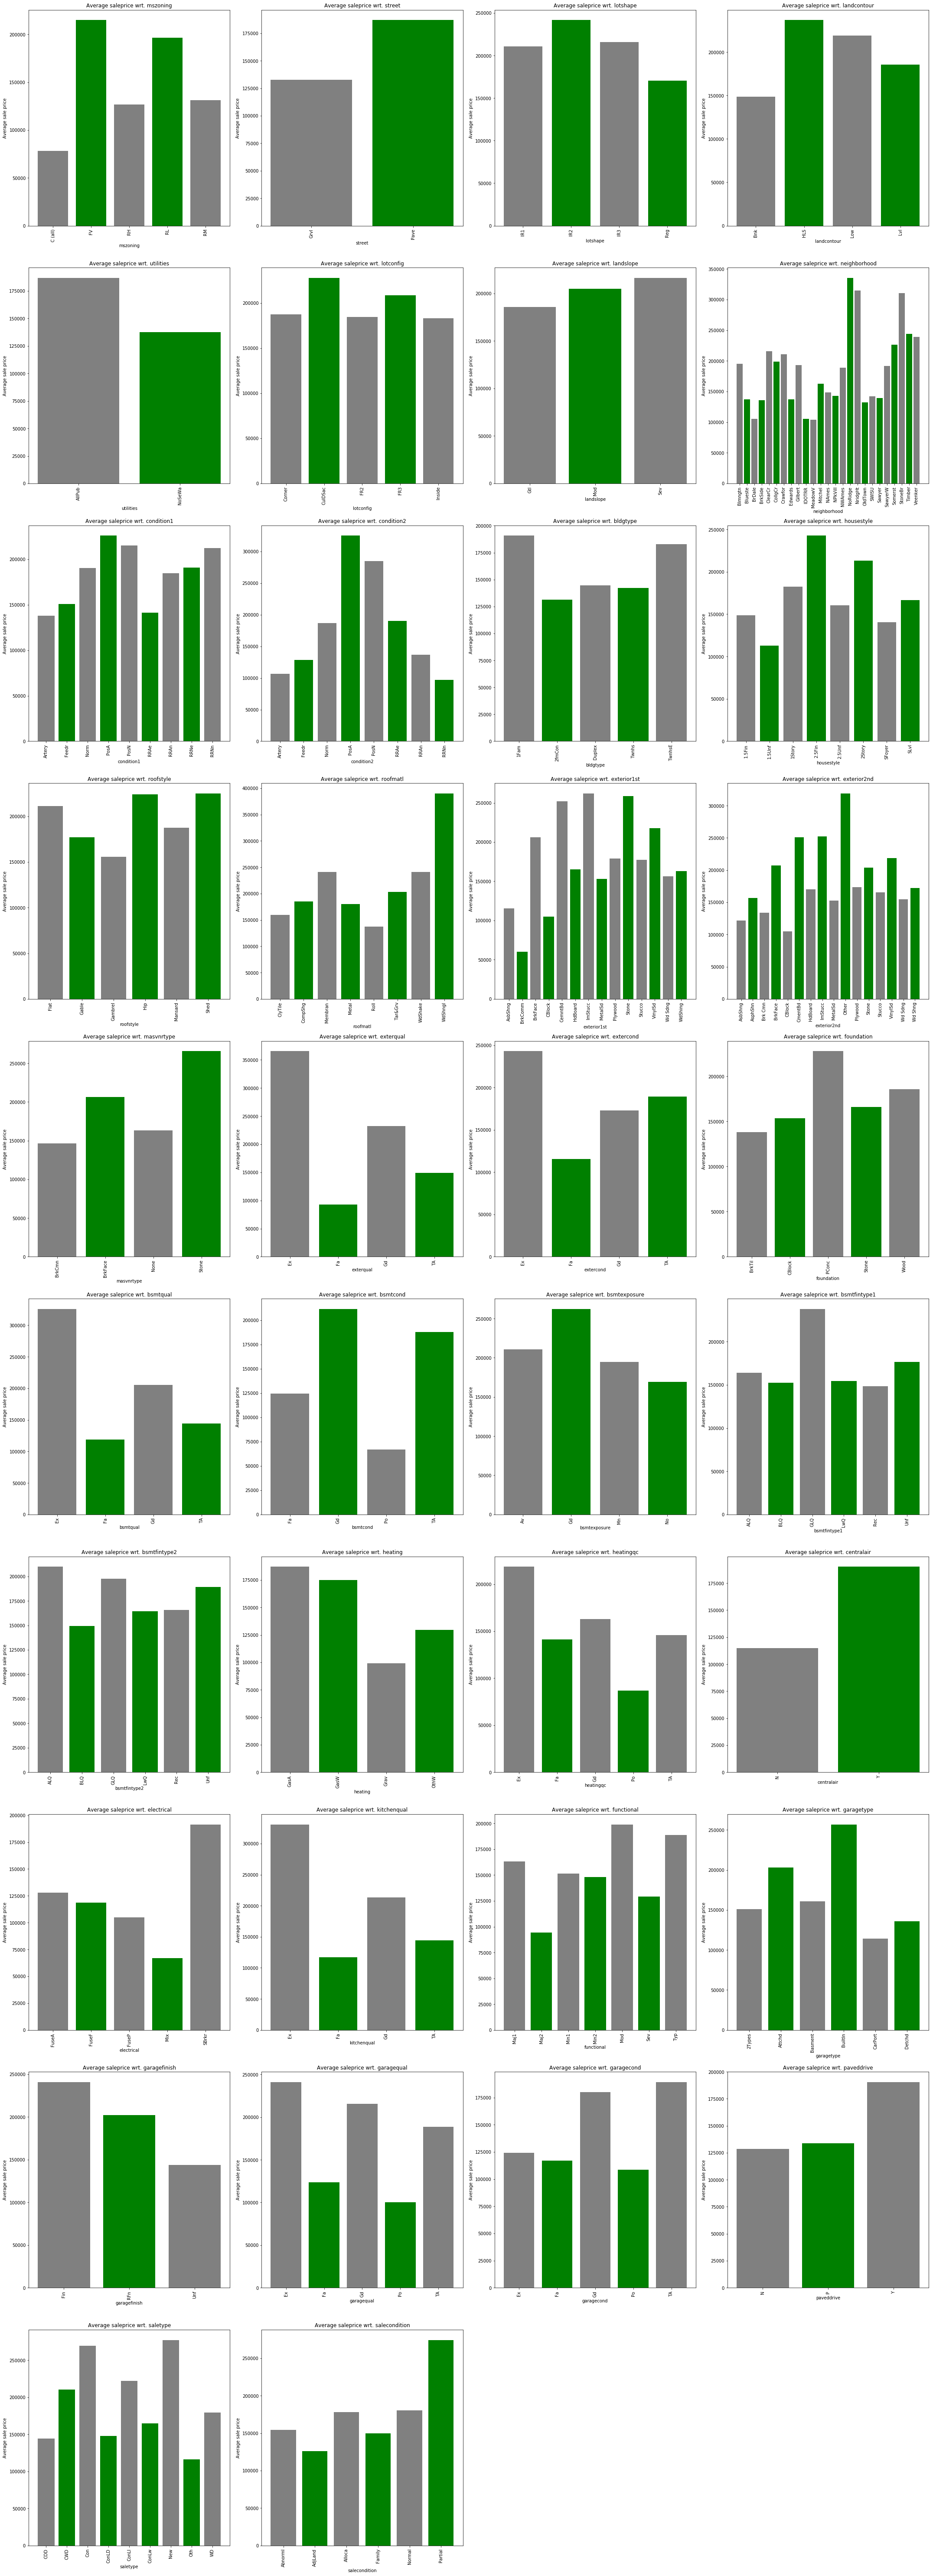

In [28]:
#To see the relationships between the variables we plot them

plt.figure(figsize=(30,90))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(prices_df.groupby(column)["saleprice"].mean().index,prices_df.groupby(column)["saleprice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


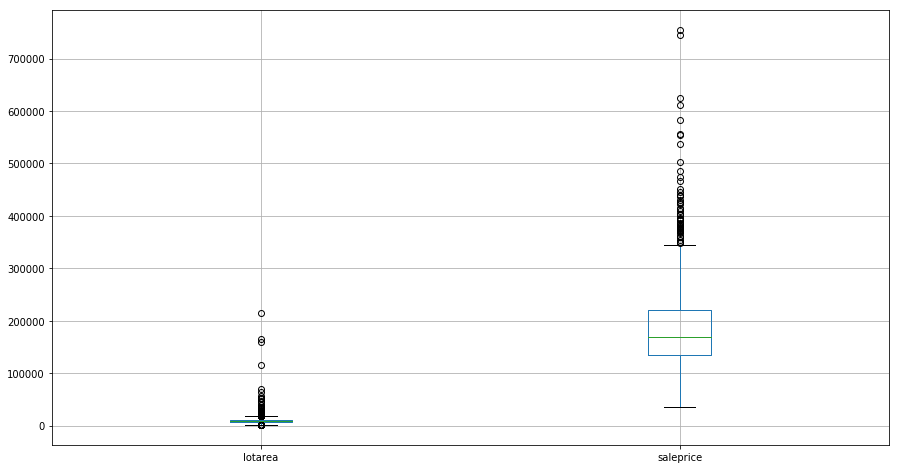

In [14]:
#Check for outliers on specific features

plt.figure(figsize=(15,8))

boxplot=prices_df.boxplot(column=['lotarea', 'saleprice'])


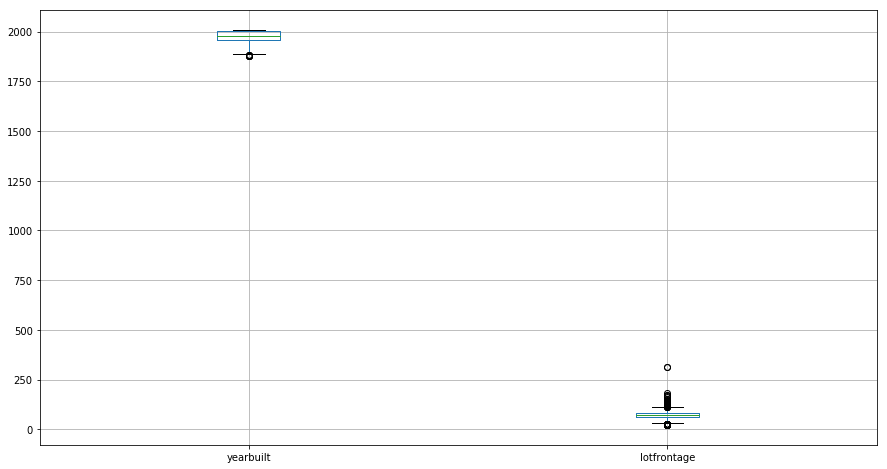

In [15]:
#Check for outliers on specific features

plt.figure(figsize=(15,8))

boxplot=prices_df.boxplot(column=['yearbuilt','lotfrontage'])


In [16]:
#Remove the outliers

import scipy.stats as stats
from scipy.stats.mstats import winsorize

def using_mstats(s):
    return winsorize(s, limits=[0.05, 0.05])

prices = prices_df.apply(using_mstats, axis=0)
prices.quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1])

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0.00,20.0,36.000000,3230.00,4.0,5.0,1918.00,1950.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.0,2006.0,100000.0
0.05,20.0,36.000000,3303.10,4.0,5.0,1918.85,1950.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.0,2006.0,100000.0
0.25,20.0,60.000000,7744.00,5.0,5.0,1956.00,1968.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,135000.0
0.50,50.0,70.049958,9600.00,6.0,5.0,1976.00,1994.5,0.0,413.0,0.00,...,6.0,28.0,0.00,0.0,0.0,0.0,0.0,6.0,2008.0,168500.0
0.75,70.0,80.000000,11760.75,7.0,6.0,2001.00,2004.0,174.0,733.0,0.00,...,174.5,70.0,0.00,0.0,0.0,0.0,0.0,8.0,2009.0,220000.0
0.95,160.0,105.000000,17508.85,8.0,8.0,2007.00,2007.0,464.3,1280.3,412.35,...,342.3,172.3,180.45,0.0,168.0,0.0,0.0,11.0,2010.0,335000.0
1.00,160.0,105.000000,17542.00,8.0,8.0,2007.00,2007.0,466.0,1282.0,420.00,...,344.0,174.0,183.00,0.0,168.0,0.0,0.0,11.0,2010.0,335000.0


### 3) Select features (variables) for the model

Target Variable (y) = saleprice
Features: 
    x1 = lotsize
    x2 = overallcond
    x3 = fullbath
    x4 = bedroomabvgr
    x5 = totalbsmtsf
    


### 4) Build Linear Regression Model

In [17]:
import statsmodels.api as sm

# Y is the target variable
Y = prices['saleprice']
# X is the feature set which includes lot size, overallcond, full & half bath, bedroomabvgr and totalbsmtsf
X = prices_df[['lotarea','overallcond', 'fullbath', 'halfbath', 'bedroomabvgr', 'totalbsmtsf']]


# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     346.0
Date:                Fri, 30 Aug 2019   Prob (F-statistic):          1.92e-267
Time:                        15:34:49   Log-Likelihood:                -16080.
No. Observations:                1338   AIC:                         3.217e+04
Df Residuals:                    1331   BIC:                         3.221e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.361e+04   8494.349     -1.602      0.109   -3.03e+04    3055.708
lotarea          0.5275      0.111      4.737      0.000       0.309       0.746
overallcond   5879.9285   1070.508      5.493      0.000    3779.861    7979.996
fullbath      5.025e+04   2344.178     21.435      0.000    4.56e+04    5.48e+04
halfbath      3.745e+04   2297.657     16.299      0.000    3.29e+04     4.2e+04
bedroomabvgr -6426.1041   1572.496     -4.087      0.000   -9510.944   -3341.264
totalbsmtsf     75.5060      3.099     24.367      0.000      69.427      81.585
==============================================================================
Omnibus:                      438.354   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13032.802
Skew:                          -0.891   Prob(JB):                         0.00
Kurtosis:                      18.185   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met; discuss the implications of the violations for the correctness of your model.


Coefficients: 
 [ 0.00000000e+00  5.27518477e-01  5.87992851e+03  5.02476826e+04
  3.74503221e+04 -6.42610406e+03  7.55060019e+01]

Intercept: 
 -13608.062948268373


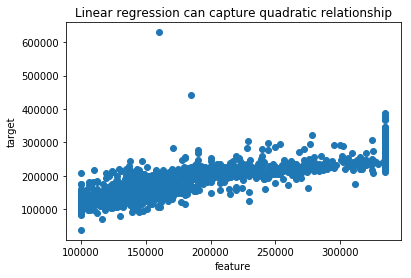

In [18]:
# fit a linear regression where target is Y & features are X
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

# predictions of the linear regression
predictions = lrm.predict(X)

# we print the estimated coefficients
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


# we plot the estimated Y and X the relationship should be quadratic
plt.scatter(Y, predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [19]:
#Check that the error term is zero on average
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 8.178654896660593e-12


In [20]:
#Check for homoscedasticity of the error (normal distribution of the error)

from scipy.stats import bartlett
from scipy.stats import levene


bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 65.4514 and p value is 5.96e-16
Levene test statistic value is 96.1189 and p value is 2.56e-22


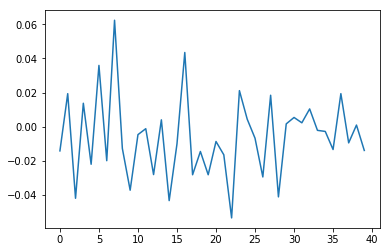

In [21]:
#Check for Multicolliniarity
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

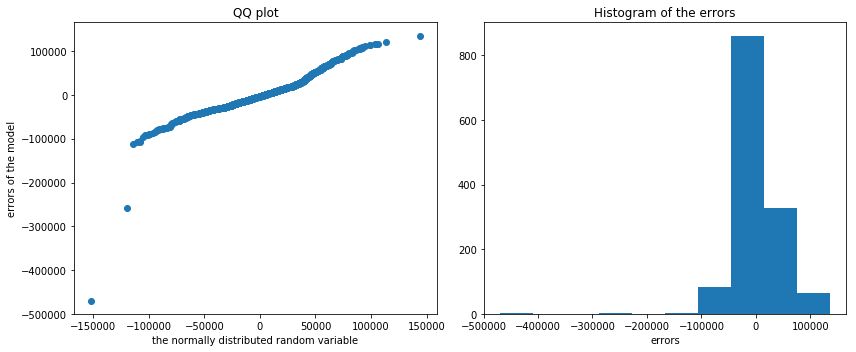

In [22]:
#Further check that the error terms are not correlated with one another
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [24]:
#Statistical check that the features are not correlated with the errors
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 13032.801892191952 and p value is 0.0
Normality test statistics is 438.3540434829448 and p value is 6.4957439528419265e-96
